In [1]:
from gtfs_functions import Feed
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import PolyLineOffset
import json

In [2]:
gtfs_path = "https://feeds.mta.maryland.gov/gtfs/local-bus"
feed = Feed(gtfs_path, time_windows=[0, 6, 10, 12, 16, 19, 24])
routes = feed.routes
routes.head(2)

INFO:root:Reading "routes.txt".


,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,network_id,as_route
0,11684,1,103,Downtown - Cromwell Bridge,NaN,3,NaN,262727,FFFFFF,core,0
1,11686,1,105,Cedonia - Downtown,NaN,3,NaN,262727,FFFFFF,core,0


INFO:root:Reading "shapes.txt".


<Axes: >

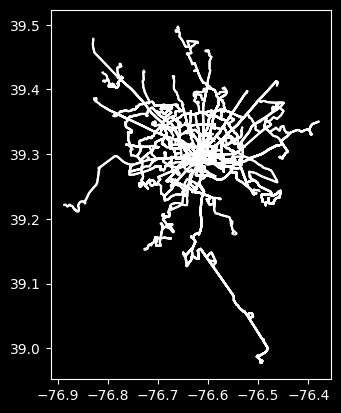

In [3]:
shapes = feed.shapes
shapes.plot()

In [4]:
shapes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   shape_id  312 non-null    object  
 1   geometry  312 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 5.0+ KB


In [5]:
# Get the location bounds
bounds = shapes.total_bounds

# Calculate the center of the bounds
center = [(bounds[1] + bounds[3]) / 2, (bounds[0] + bounds[2]) / 2]

# Calculate the zoom level based on the bounds
zoom = 10

# Print the bounds and zoom level
print("Bounds:", bounds)
print("Center:", center)
print("Zoom:", zoom)
# Get the location bounds 

# Create a map centered at the calculated center with the specified zoom level
map = folium.Map(location=center, zoom_start=zoom)

# Display the map
# map


Bounds: [-76.8885   38.97813 -76.37926  39.49724]
Center: [39.237685, -76.63388]
Zoom: 10


In [6]:
# Define line color and weight
line_color = 'red'
line_weight = 6

# Function to calculate offsets
def calculate_offset(index, total):
    return index * (line_weight + 1) - (total / 2) + ((line_weight + 1) / 2)

# Loop through the features and add them with offsets
for index, feature in shapes.head(5).iterrows():
    coords = feature['geometry'].coords[:]
    offset = calculate_offset(index, len(shapes))

    # Add lines with offsets
    PolyLineOffset(coords, color=line_color, weight=line_weight, opacity=1, offset=offset).add_to(map)
    
map

In [7]:
# Define line colors and weights
line_colors = ['red', '#08f', '#0c0', '#f80']
line_weight = 6

# Function to calculate offsets
def calculate_offset(index, total):
    return index * (line_weight + 1) - (total / 2) + ((line_weight + 1) / 2)

# Loop through the features and add them with offsets
for index, feature in shapes.iterrows():
    coords = feature['geometry'].coords[:]
    lines = feature['properties']['lines']
    segment_width = len(lines) * (line_weight + 1)

    # Add background and foreground lines
    folium.PolyLine(coords, color='black', weight=segment_width + 5, opacity=1).add_to(map)
    folium.PolyLine(coords, color='white', weight=segment_width + 3, opacity=1).add_to(map)

    # Add colored lines with offsets
    for index, line in enumerate(lines):
        PolyLineOffset(coords, color=line_colors[line], weight=line_weight, opacity=1,
                       offset=calculate_offset(index, segment_width)).add_to(map)

KeyError: 'properties'